# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

results = pd.merge(mouse_metadata,study_results,how="outer",on="Mouse ID")


# Display the data table for preview
results.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [42]:
# Checking the number of mice.
unique_mice =len(set(results["Mouse ID"]))
print(unique_mice)

249


In [43]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id =results.loc[results.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [44]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df =results.loc[results["Mouse ID"]=="g989",:]
duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [45]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df =results[results["Mouse ID"].isin(duplicate_mice_id)==False]
clean_mice_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [46]:
# Checking the number of mice in the clean DataFrame.
unique_mice =clean_mice_df["Mouse ID"].nunique()
print(unique_mice)

248


## Summary Statistics

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean =clean_mice_df["Tumor Volume (mm3)"].groupby(clean_mice_df["Drug Regimen"]).mean()
median =clean_mice_df["Tumor Volume (mm3)"].groupby(clean_mice_df["Drug Regimen"]).median()
var =clean_mice_df["Tumor Volume (mm3)"].groupby(clean_mice_df["Drug Regimen"]).var()
std =clean_mice_df["Tumor Volume (mm3)"].groupby(clean_mice_df["Drug Regimen"]).std()
SEM =clean_mice_df["Tumor Volume (mm3)"].groupby(clean_mice_df["Drug Regimen"]).sem()
print(mean)
summary_stat =pd.DataFrame({"Mean Tumor Volume":mean,
                            "Median Tumor Volume":median,
                            "Tumor Volume Variance":var,
                            "Tumor Volume Std. Dev.":std,
                            "Tumor Volume Std. Err.":SEM})
summary_stat

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [48]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

summary_statistics = clean_mice_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics


# Using the aggregation method, produce the same summary statistics in a single line

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

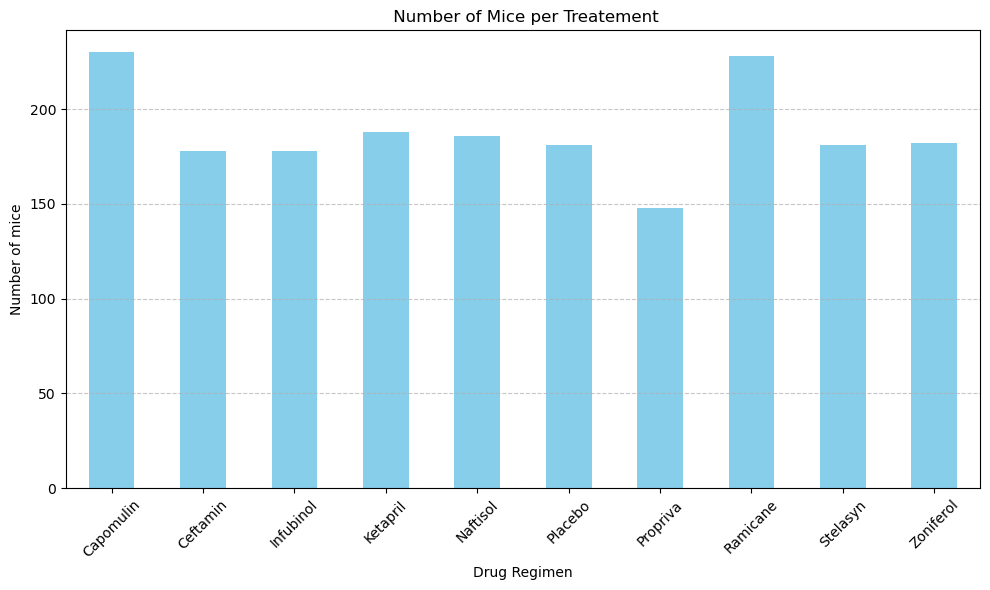

In [49]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = clean_mice_df.groupby('Drug Regimen').size()


# Plotting the bar plot
drug_regimen_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title(' Number of Mice per Treatement')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of mice')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



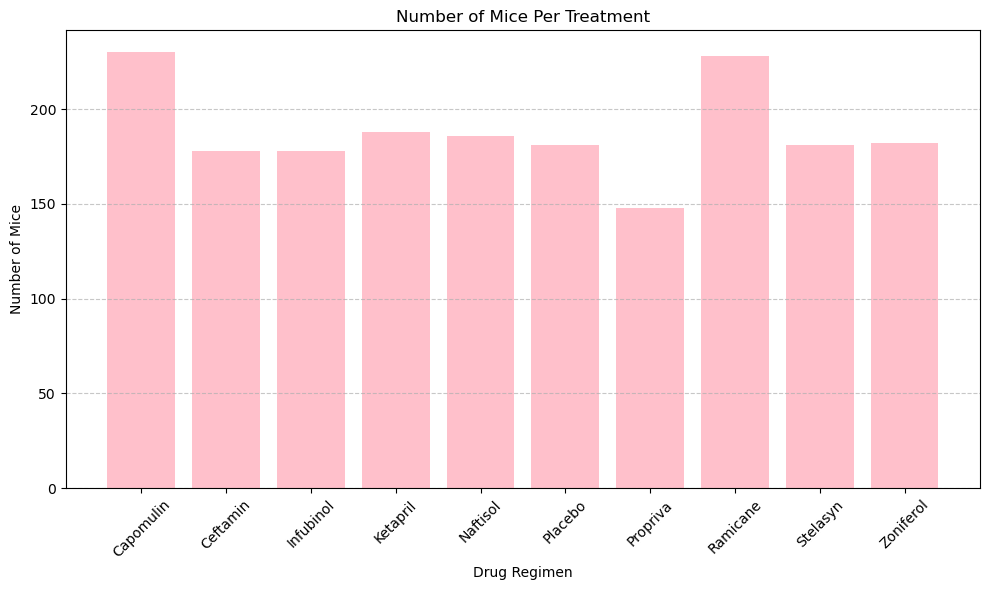

In [50]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Extracting regimen names and corresponding counts
x_axis =drug_regimen_counts.index.values
y_axis =drug_regimen_counts.values



# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(x_axis,y_axis, color='pink')
plt.title('Number of Mice Per Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

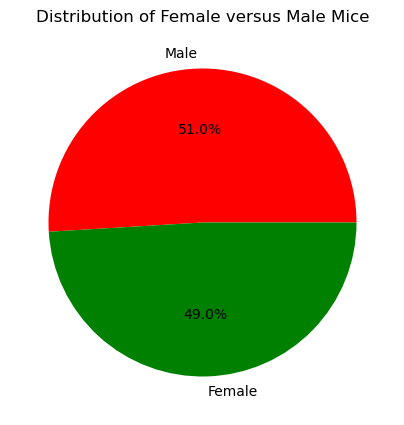

In [51]:
gender_distribution = clean_mice_df['Sex'].value_counts()

# Plotting the pie plot using pandas
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['red', 'green'], figsize=(5, 5))
plt.title('Distribution of Female versus Male Mice')
plt.ylabel('')  # Remove the ylabel
plt.show()

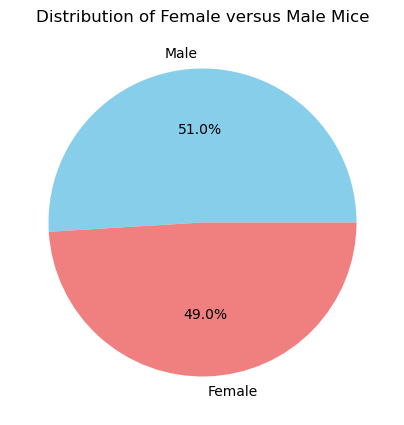

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Assuming df is your DataFrame with a column 'Sex' indicating the gender of mice
# Counting the number of male and female mice
gender_distribution = clean_mice_df['Sex'].value_counts()

# Plotting the pie plot using pyplot
plt.figure(figsize=(5, 5))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Female versus Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [53]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df =clean_mice_df.loc[clean_mice_df["Drug Regimen"]=="Capomulin",:]
Ramican_df =clean_mice_df.loc[clean_mice_df["Drug Regimen"]=="Ramican",:]
Infubinol_df =clean_mice_df.loc[clean_mice_df["Drug Regimen"]=="Infubinol",:]
Ceftamin_df =clean_mice_df.loc[clean_mice_df["Drug Regimen"]=="Ceftamin",:]


# Start by getting the last (greatest) timepoint for each mouse
# Step 2: Filter the DataFrame to include only specified treatment regimens
Capomulin_last =Capomulin_df.groupby("Mouse ID").max()["Timepoint"]
Capomulin_vol =pd.DataFrame(Capomulin_last)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_merge =pd.merge(Capomulin_vol,clean_mice_df,on=("Mouse ID","Timepoint"),how="left")


In [54]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_data =[]

for treatment in treatments:
    drug_df =clean_mice_df.loc[clean_mice_df["Drug Regimen"]==treatment,:]
    drug_last =drug_df.groupby("Mouse ID").max()["Timepoint"]
    drug_vol =pd.DataFrame(drug_last)
    drug_merge =pd.merge(drug_vol,clean_mice_df,on=("Mouse ID","Timepoint"),how="left")
    tumors =drug_merge["Tumor Volume (mm3)"]
    tumor_vol_data.append(tumors)
     # Calculate quartiles and IQR
    quartiles = tumors.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Calculate upper and lower bounds
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    print(lower_q)
    print(upper_q)
    print(iqr)
    print(lower_bound)
    print(upper_bound)

    

32.37735684
40.1592203
7.781863460000004
20.70456164999999
51.83201549
31.56046955
40.65900627
9.098536719999998
17.912664470000003
54.30681135
54.04860769
65.52574285
11.477135160000003
36.83290494999999
82.74144559000001
48.72207785
64.29983003
15.577752179999997
25.355449580000002
87.66645829999999


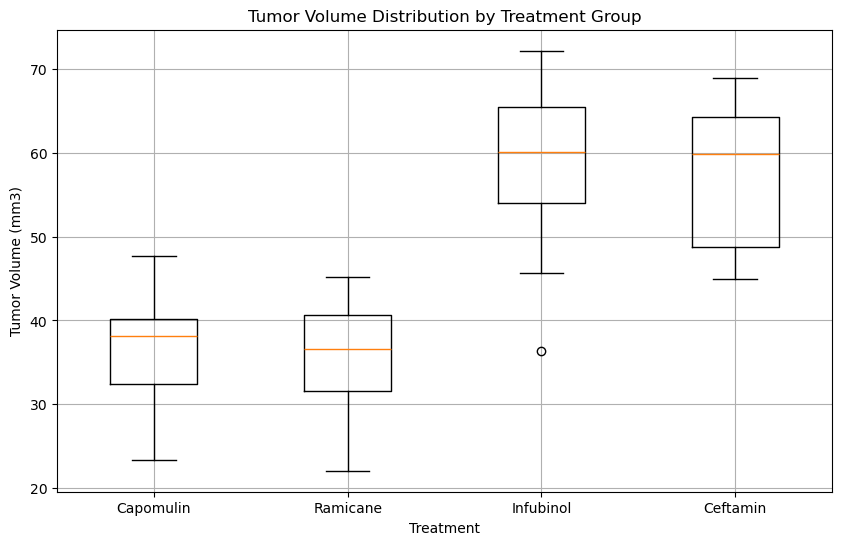

In [55]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create a boxplot
plt.figure(figsize=(10,6))
plt.boxplot(tumor_vol_data, labels=treatments)
plt.title('Tumor Volume Distribution by Treatment Group')
plt.xlabel('Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()


Text(0, 0.5, 'Tumor Volume (mm3)')

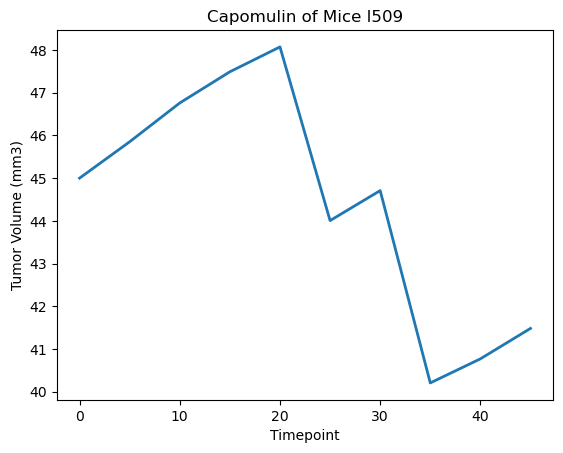

In [58]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df =clean_mice_df.loc[clean_mice_df["Drug Regimen"]=="Capomulin",:]
line_df =Capomulin_df.loc[Capomulin_df["Mouse ID"]=="l509",:]
fig1,ax1 =plt.subplots()
plt.title ("Capomulin of Mice l509")
plt.plot(line_df["Timepoint"],line_df['Tumor Volume (mm3)'],linewidth=2)
plt.xlabel("Timepoint")
plt.ylabel('Tumor Volume (mm3)')

## Line and Scatter Plots

Text(0.5, 0, 'Weight (g)')

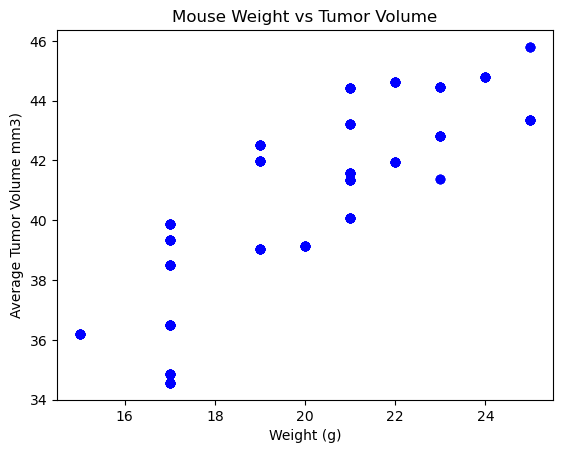

In [57]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average_vol =Capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

merge_data =pd.merge(average_vol,Capomulin_df[["Mouse ID","Weight (g)"]],on="Mouse ID",how="left")
fig1,ax1 =plt.subplots()
plt.title ("Mouse Weight vs Tumor Volume")
plt.scatter(merge_data["Weight (g)"],merge_data['Tumor Volume (mm3)'],color="blue")
plt.ylabel("Average Tumor Volume mm3)")
plt.xlabel("Weight (g)")


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.83
The r-squared is: 0.696


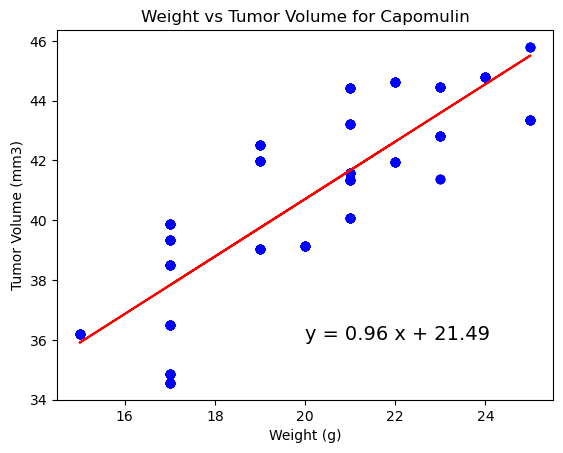

In [40]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
correlation = st.pearsonr(merge_data['Weight (g)'],merge_data['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
(slope, intercept,rvalue, pvalue, stderr)= linregress(merge_data["Weight (g)"],merge_data["Tumor Volume (mm3)"])
regress_values=merge_data["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(merge_data["Weight (g)"],merge_data["Tumor Volume (mm3)"],color='b')
plt.plot(merge_data["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()